In [1]:
import pandas as pd
import numpy as np
import sys
import statsmodels.api as sm
import statsmodels.formula.api as smf
#pd.set_option('display.width', 5000) 
#pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

pd.options.mode.chained_assignment = None  # default='warn'

my_dpi=72

print('This is loaded')

This is loaded


In [2]:
#base = pd.read_csv('rc15csv/pai2015before.csv', thousands=",", index_col='schid')
base = pd.read_csv('rc15csv/tim2015data.csv', thousands=",", index_col='schid')
base.shape

(4094, 54)

In [3]:
#hsval = ['CHARTER HIGH SCH+','CHARTER NET HIGH SCH+','HIGH SCHOOL+']
HSval = ['CHARTER NET','CHARTER NET SCH','CHARTER HIGH SCH+','CHARTER NET HIGH SCH+','HIGH SCHOOL+']
HSbase = base[~base.schooltype.isin(HSval)]
HSbase.shape

(3997, 54)

In [4]:
hsvalue = ['']
hsbase = HSbase[~HSbase.zelemscore2015.isin(hsvalue)]
hsbase.shape

(3997, 54)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     372.4
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           4.78e-65
Time:                        14:18:07   Log-Likelihood:                -2400.9
No. Observations:                 608   AIC:                             4806.
Df Residuals:                     606   BIC:                             4815.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     44.2703      1.107     39.984      0.000        42.096    46.445
x             -0.3887      0.020    -19.298      0.000        -0.428    -0.349
==============================================================================
Omnibus:                       93.393   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.812
Skew:                           0.848   Prob(JB):                     2.48e-44
Kurtosis:                       5.247   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

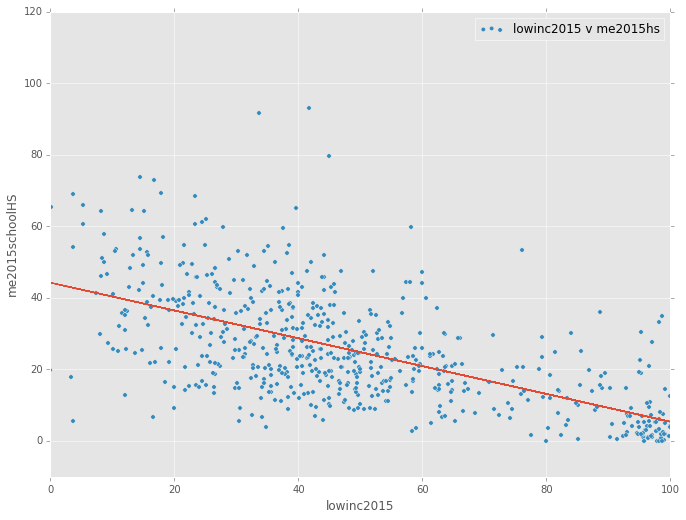

In [5]:
x = hsbase['lowinc2015']
y = hsbase['me2015schoolHS']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=hsbase).fit()

hsbase.plot(kind='scatter', x='lowinc2015', y='me2015schoolHS',label="lowinc2015 v me2015hs", figsize=(800/my_dpi, 600/my_dpi))
plt.ylim(-10, 120)
plt.xlim(0, 100)
plt.legend()

# plots the trendline

plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     629.8
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           1.42e-95
Time:                        14:18:14   Log-Likelihood:                -2304.0
No. Observations:                 602   AIC:                             4612.
Df Residuals:                     600   BIC:                             4621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.6991      1.314     -4.337      0.000        -8.280    -3.118
x              0.6139      0.024     25.096      0.000         0.566     0.662
==============================================================================
Omnibus:                       16.324   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.212
Skew:                           0.263   Prob(JB):                     1.50e-05
Kurtosis:                       3.781   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

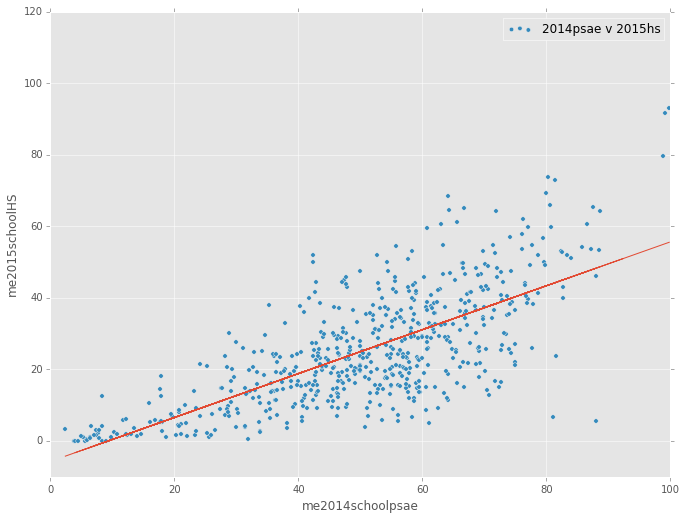

In [6]:

x = hsbase['me2014schoolpsae']
y = hsbase['me2015schoolHS']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=hsbase).fit()

hsbase.plot(kind='scatter', x='me2014schoolpsae', y='me2015schoolHS',label="2014psae v 2015hs", figsize=(800/my_dpi, 600/my_dpi))
plt.ylim(-10, 120)
plt.xlim(0, 100)
plt.legend()

# plots the trendline

plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()